In [111]:
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%qtconsole

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from loren_frank_data_processing import (get_interpolated_position_dataframe,
                                         get_LFP_dataframe,
                                         get_multiunit_indicator_dataframe,
                                         make_epochs_dataframe,
                                         make_tetrode_dataframe,
                                         reshape_to_segments)
from replay_classification import ClusterlessDecoder
from ripple_detection import Karlsson_ripple_detector, Kay_ripple_detector

from src.parameters import ANIMALS as animals
from src.parameters import SAMPLING_FREQUENCY as sampling_frequency

In [3]:
epoch_key = ('bon', 4, 2)

In [4]:
brain_areas = ['CA1', 'iCA1', 'CA3']

tetrode_info = make_tetrode_dataframe(animals).xs(
        epoch_key, drop_level=False)
brain_areas = [brain_areas] if isinstance(brain_areas, str) else brain_areas
is_brain_areas = tetrode_info.area.isin(brain_areas)
if 'CA1' in brain_areas:
    is_brain_areas = is_brain_areas & (
        tetrode_info.descrip.isin(['riptet']) | tetrode_info.validripple)
tetrode_keys = tetrode_info[is_brain_areas].index.tolist()
hippocampus_lfps = pd.concat(
    [get_LFP_dataframe(tetrode_key, animals)
     for tetrode_key in tetrode_keys], axis=1)
time = hippocampus_lfps.index

def _time_function(epoch_key, animals):
    return time

speed = get_interpolated_position_dataframe(
    epoch_key, animals, _time_function, max_distance_from_well=5).speed

In [5]:
tetrode_info[is_brain_areas]

animal area  day    depth descrip  epoch  \
animal day epoch tetrode_number                                            
bon    4   2     4                 bon  CA1    4  [[107]]     NaN      2   
                 5                 bon  CA1    4  [[105]]     NaN      2   
                 11                bon  CA1    4   [[96]]     NaN      2   
                 12                bon  CA1    4  [[136]]     NaN      2   
                 13                bon  CA1    4   [[94]]     NaN      2   
                 14                bon  CA1    4   [[96]]     NaN      2   
                 17                bon  CA1    4  [[108]]     NaN      2   
                 29                bon  CA1    4  [[118]]     NaN      2   

                                hemisphere  maxcell  nearCA2  numcells  \
animal day epoch tetrode_number                                          
bon    4   2     4                   right      NaN      0.0       2.0   
                 5                   right      NaN      0.0       5.0   
                 11                  right      NaN      0.0       6.0   
                 12                   left      NaN      0.0       4.0   
                 13                   left      NaN      0.0       4.0   
                 14                   left      1.0      0.0       8.0   
                 17                   left      NaN      0.0       2.0   
                 29                  right      NaN      0.0       4.0   

                                 representative subarea     tetrode_id  \
animal day epoch tetrode_number                                          
bon    4   2     4                          NaN    CA1c  bon_04_02_004   
                 5                          NaN    CA1c  bon_04_02_005   
                 11                         NaN    CA1c  bon_04_02_011   
                 12                         NaN    CA1c  bon_04_02_012   
                 13                         NaN    CA1c  bon_04_02_013   
                 14                         1.0    CA1c  bon_04_02_014   
                 17                         NaN    CA1c  bon_04_02_017   
                 29                         NaN    CA1c  bon_04_02_029   

                                 tetrode_number  validripple  
animal day epoch tetrode_number                               
bon    4   2     4                            4          1.0  
                 5                            5          1.0  
                 11                          11          1.0  
                 12                          12          1.0  
                 13                          13          1.0  
                 14                          14          1.0  
                 17                          17          1.0  
                 29                          29          1.0

In [6]:
hippocampus_lfps

,electric_potential,electric_potential,electric_potential,electric_potential,electric_potential,electric_potential,electric_potential,electric_potential
time,,,,,,,,
00:41:00.988800,-73.0,-42.0,18.0,-156.0,-190.0,-183.0,-176.0,NaN
00:41:00.989467,-74.0,-16.0,10.0,-165.0,-199.0,-180.0,-177.0,NaN
00:41:00.990134,-53.0,20.0,7.0,-153.0,-189.0,-140.0,-168.0,NaN
00:41:00.990801,-42.0,26.0,2.0,-126.0,-161.0,-120.0,-134.0,NaN
00:41:00.991468,-33.0,26.0,-2.0,-100.0,-125.0,-141.0,-104.0,NaN
00:41:00.992135,-22.0,29.0,-17.0,-88.0,-96.0,-167.0,-91.0,NaN
00:41:00.992802,5.0,24.0,-51.0,-98.0,-74.0,-171.0,-77.0,NaN
00:41:00.993469,32.0,-28.0,-72.0,-82.0,-51.0,-137.0,-49.0,NaN
00:41:00.994136,-41.0,-80.0,-90.0,-77.0,-33.0,-122.0,-16.0,NaN


In [9]:
from ripple_detection.core import filter_ripple_band
filtered_lfps = pd.concat([
    pd.Series(filter_ripple_band(lfp.squeeze(),
                       sampling_frequency=sampling_frequency), index=time)
    for lfp in hippocampus_lfps.values.T], axis=1)

In [57]:
karlsson_ripple_times = Karlsson_ripple_detector(
        time, hippocampus_lfps.values, speed.values, sampling_frequency,
        minimum_duration=pd.Timedelta(milliseconds=15), zscore_threshold=3)

In [26]:
def plot_ripple(ripple_times, ripple_number, figsize=(6, 12)):
    window_start = ripple_times.loc[ripple_number].start_time - pd.Timedelta(milliseconds=300)
    ripple_start = ripple_times.loc[ripple_number].start_time
    ripple_end = ripple_times.loc[ripple_number].end_time
    window_end = ripple_times.loc[ripple_number].start_time + pd.Timedelta(milliseconds=300)
    data = hippocampus_lfps.loc[window_start:window_end]
    filtered_data = filtered_lfps.loc[window_start:window_end]
    t = data.index.total_seconds()
    n_lfps = data.shape[1]

    fig, axes = plt.subplots(n_lfps, 1, sharex=True, sharey=True, figsize=figsize)

    for ax, lfp, filtered_lfp in zip(axes, data.values.T, filtered_data.values.T):
        ax.plot(t.values[~np.isnan(lfp)], lfp[~np.isnan(lfp)])
        ax.plot(t.values[~np.isnan(filtered_lfp)], filtered_lfp[~np.isnan(filtered_lfp)],
                linewidth=2, alpha=0.8)
        ax.axvspan(ripple_start.total_seconds(), ripple_end.total_seconds(),
                   linestyle='--', color='lightgreen', alpha=0.5)

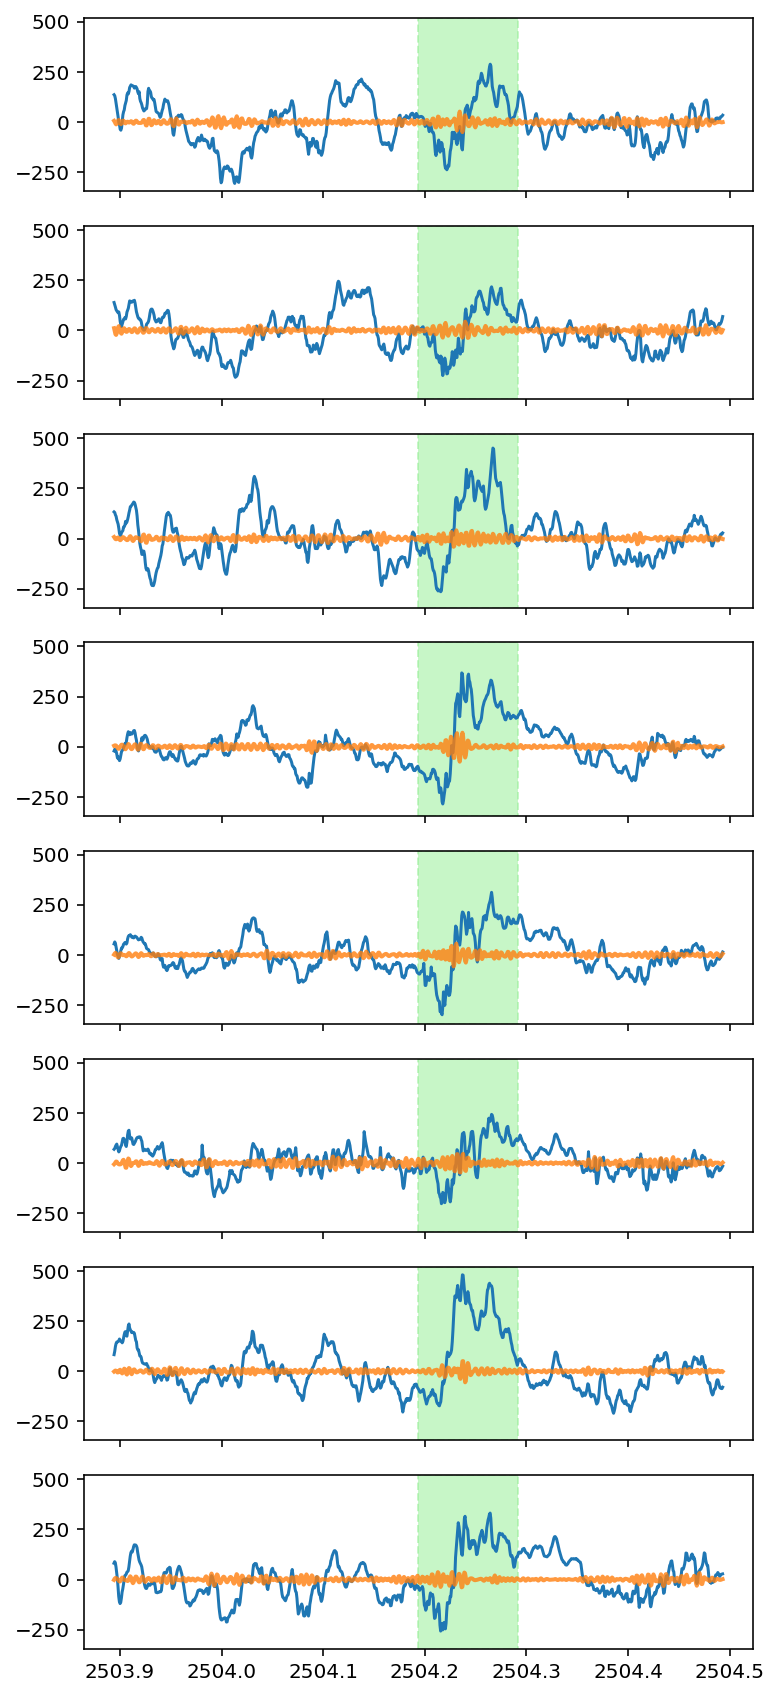

In [98]:
ripple_number = 10

plot_ripple(karlsson_ripple_times, ripple_number, figsize=(6, 15))

In [99]:
sampling_frequency = 1500

kay_ripple_times = Kay_ripple_detector(
        time, hippocampus_lfps.values, speed.values, sampling_frequency,
        minimum_duration=pd.Timedelta(milliseconds=20), zscore_threshold=3)

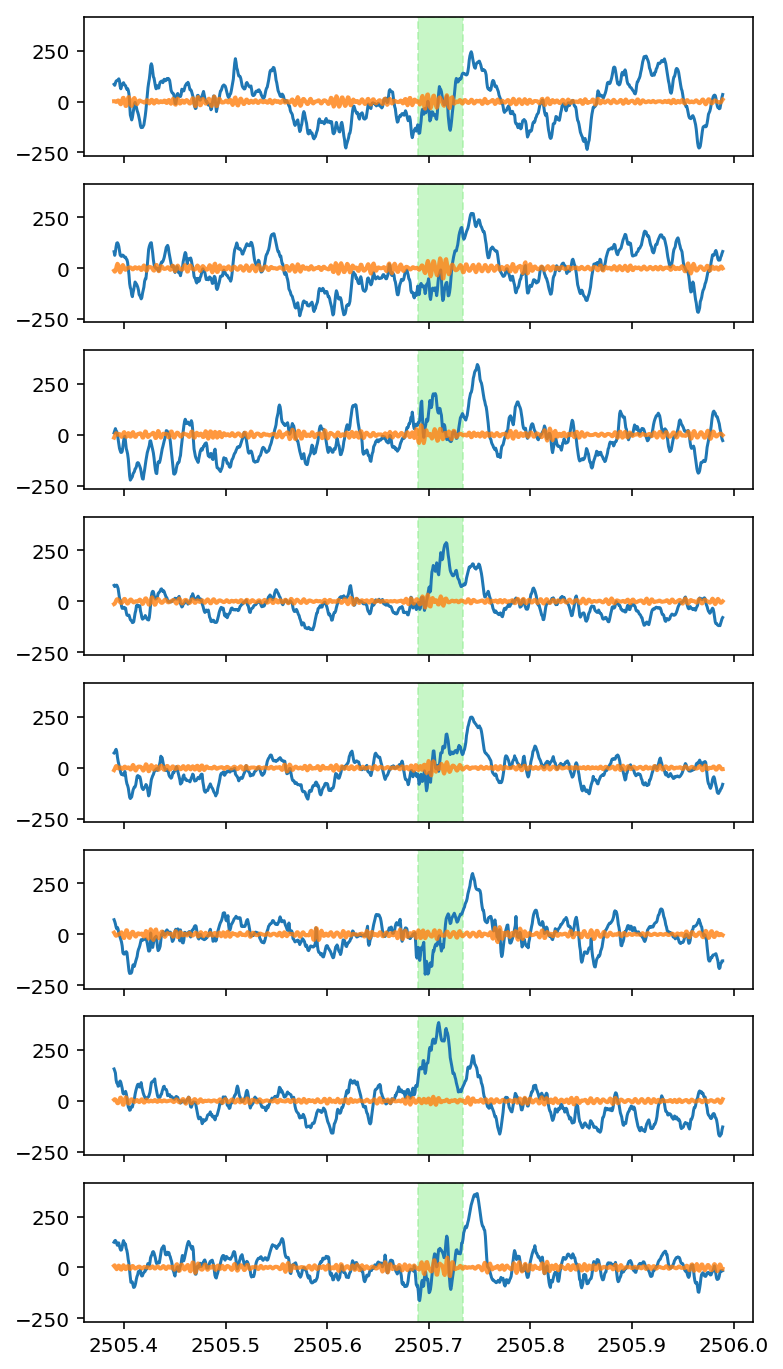

In [100]:
ripple_number = 3

plot_ripple(kay_ripple_times, ripple_number)

In [141]:
from src.analysis import decode_ripple_clusterless

(kay_ripple_info, kay_decision_state_probability,
 kay_posterior_density) = decode_ripple_clusterless(epoch_key, animals, kay_ripple_times, brain_areas=['CA1', 'CA3'])

INFO:src.analysis:Decoding ripples
INFO:replay_classification.decoders:Fitting state transition model...
INFO:replay_classification.decoders:Fitting observation model...
INFO:src.analysis:Predicting replay types


In [232]:
mark_names = None

tetrode_info = make_tetrode_dataframe(animals).xs(
    epoch_key, drop_level=False)
brain_areas = [brain_areas] if isinstance(brain_areas, str) else brain_areas
is_brain_areas = tetrode_info.area.isin(brain_areas)
brain_areas_tetrodes = tetrode_info[
    is_brain_areas &
    ~tetrode_info.descrip.str.endswith('Ref').fillna(False) &
    ~tetrode_info.descrip.str.startswith('Ref').fillna(False) &
    tetrode_info.numcells > 0]

def time(epoch_key, animals):
    lfp_df = pd.concat(
        [get_LFP_dataframe(tetrode_key, animals)
         for tetrode_key in brain_areas_tetrodes.index],
        axis=1)
    return lfp_df.index
position_info = get_interpolated_position_dataframe(
    epoch_key, animals, max_distance_from_well=5, time_function=time)

if mark_names is None:
    # Use all available mark dimensions
    mark_names = get_multiunit_indicator_dataframe(
        brain_areas_tetrodes.index[0], animals, time_function=time).columns.tolist()
    mark_names = [mark_name for mark_name in mark_names
                  if mark_name not in ['x_position', 'y_position']]

is_training = (position_info.speed > 4) & position_info.is_correct
marks = [(get_multiunit_indicator_dataframe(tetrode_key, animals,
                                            time_function=time)
          .loc[:, mark_names])
         for tetrode_key in brain_areas_tetrodes.index]
marks = [tetrode_marks for tetrode_marks in marks
         if (tetrode_marks.loc[is_training].dropna()
             .shape[0]) != 0]

train_position_info = position_info.loc[is_training]

training_marks = np.stack([
    tetrode_marks.loc[train_position_info.index, mark_names]
    for tetrode_marks in marks], axis=0)

decoder = ClusterlessDecoder(
    train_position_info.linear_distance.values,
    train_position_info.task.values,
    training_marks,
    replay_speedup_factor=16,
).fit()

INFO:replay_classification.decoders:Fitting state transition model...
INFO:replay_classification.decoders:Fitting observation model...


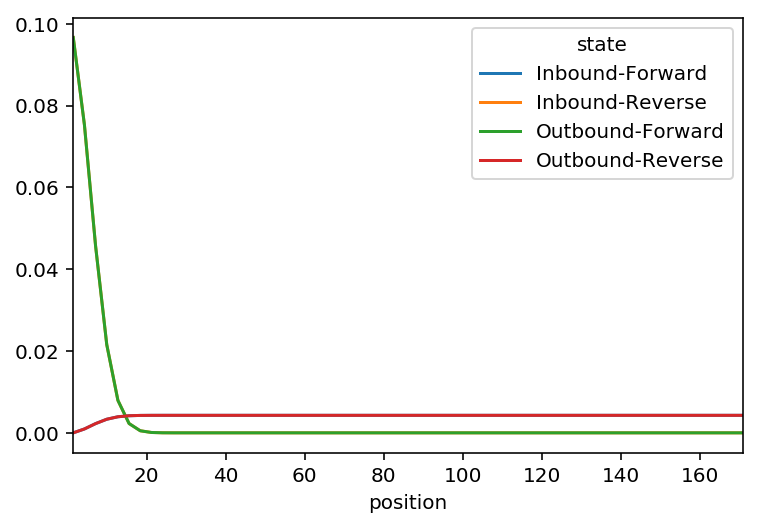

In [233]:
decoder.plot_initial_conditions()

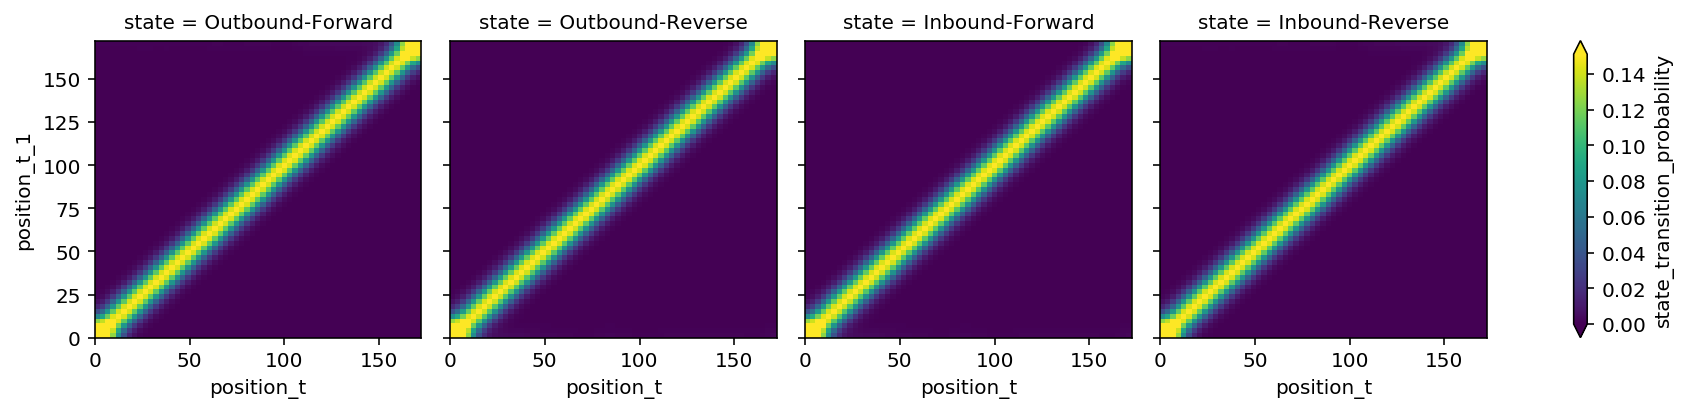

In [234]:
decoder.plot_state_transition_model()

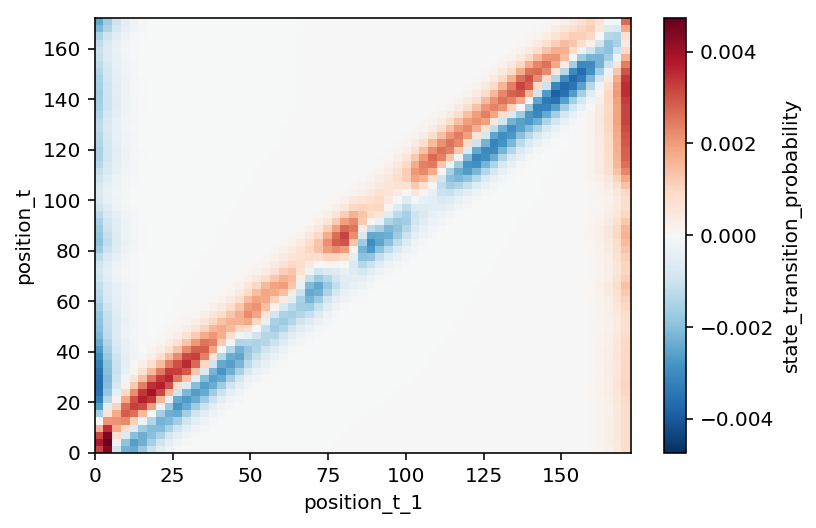

In [238]:
(decoder.state_transition_matrix.sel(state='Outbound-Forward') -
 decoder.state_transition_matrix.sel(state='Inbound-Forward')).plot(x='position_t_1', y='position_t')

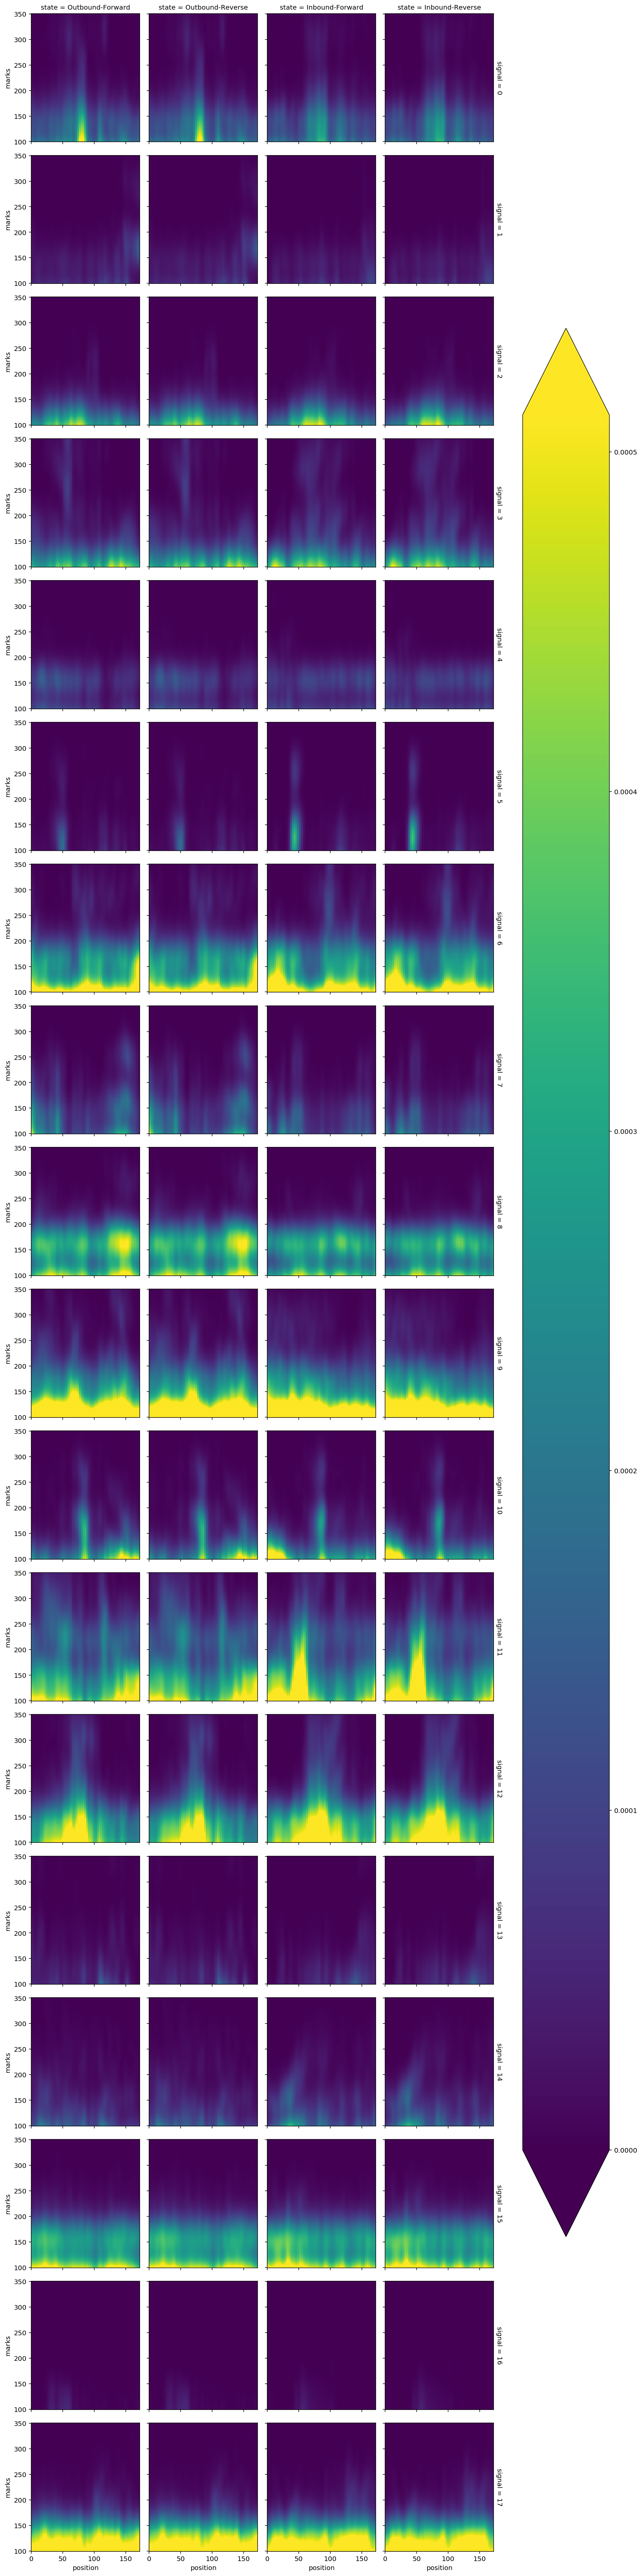

In [239]:
decoder.plot_observation_model()

In [241]:
from src.analysis import _get_ripple_marks
test_marks = _get_ripple_marks(marks, kay_ripple_times)

In [242]:
results = [decoder.predict(ripple_marks, time)
               for ripple_marks, time in test_marks]

In [252]:
r = results[1]

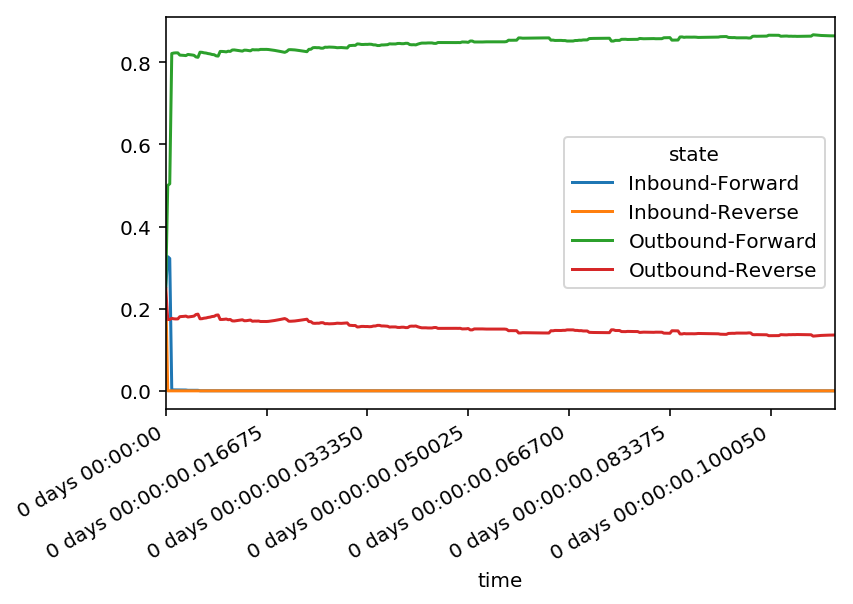

In [262]:
results[3].plot_state_probability()

In [263]:
r = results[3]

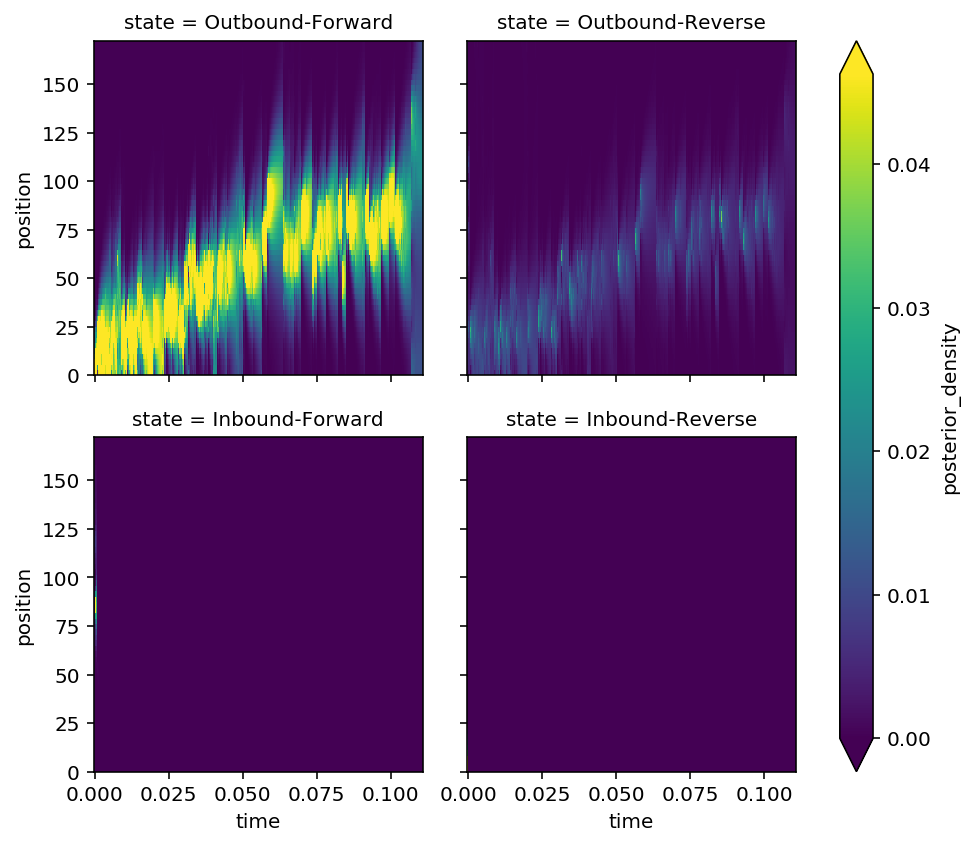

In [286]:
p = r.results['posterior_density']
p['time'] = p.time.to_index().total_seconds()
p.plot(x='time', y='position', col='state', col_wrap=2, robust=True)

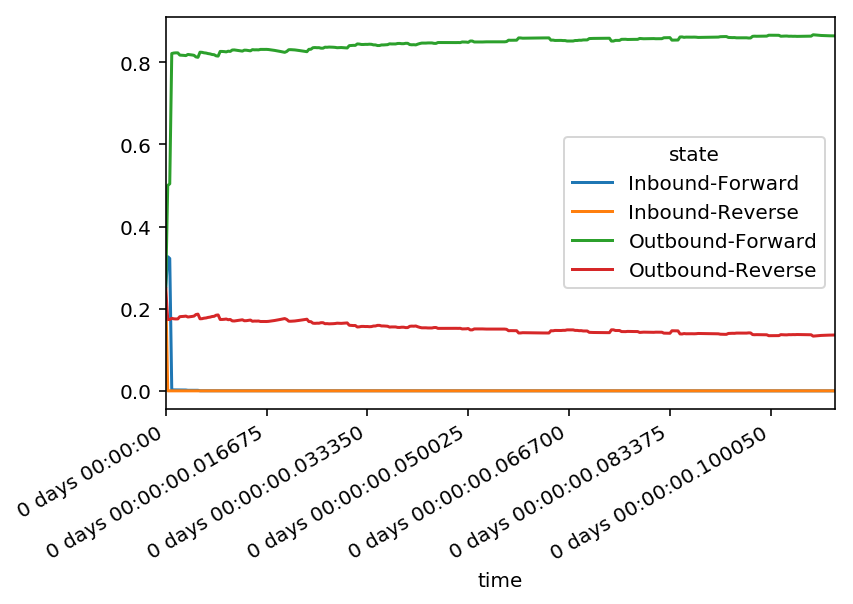

In [287]:
r.plot_state_probability()